In [3]:
import my_tools as mt


def plot_spread(subject, countries=[], scale='lin', days=0):
    sizes = (17, 6)
    
    if days == 0:
        days = len(df_cases_daily)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    label1 = ''
    label2 = ''
    
    if subject == 'daily':
        df1 = df_cases_daily
        df2 = df_deaths_daily
    elif subject == 'weekly':
        df1 = df_cases_weekly
        df2 = df_deaths_weekly
    elif subject == 'total':
        df1 = df_cases_total
        df2 = df_deaths_total
    elif subject == 'incidence':
        df1 = df_incidence_daily
        df2 = df_incidence_weekly
    elif subject == 'prevalence':
        df1 = df_prevalence
        df2 = df_mortality
    
    if scale == 'lin':
        title1 = subject.capitalize() + ' cases'
        title2 = subject.capitalize() + ' deaths'
    
        if countries:
            df1[countries].tail(days).plot(figsize=sizes, ax=ax1)
            df2[countries].tail(days).plot(figsize=sizes, ax=ax2, legend=False)
            ax1.legend(frameon=False, loc='upper left')
        else: 
            df1.tail(days).plot(figsize=sizes, ax=ax1, legend=False)
            df2.tail(days).plot(figsize=sizes, ax=ax2, legend=False)   
            
    elif scale == 'log':
        title1 = subject.capitalize() + ' cases (log scale + normalizing translation)'
        title2 = subject.capitalize() + ' deaths (log scale + normalizing translation)'
        
        label1 = 'Days since 100 cases'
        label2 = 'Days since 10 deaths'
        
        if subject in ['daily, total']:
            per = 'daily'
        else:
            per = 'weekly'
        
        df1 = threshold_data(df1, 'cases', per)
        df2 = threshold_data(df2, 'deaths', per)
        
        if countries:
            df1[countries].dropna(axis=0, how='all').plot(figsize=sizes, ax=ax1, legend=False)
            df2[countries].dropna(axis=0, how='all').plot(figsize=sizes, ax=ax2)
            ax2.legend(frameon=False, loc='lower right')
        else: 
            df1.tail(days).plot(figsize=sizes, ax=ax1, legend=False)
            df2.tail(days).plot(figsize=sizes, ax=ax2, legend=False)
        
        ax1.set_yscale('log')
        ax1.set_ylim(ymin=100)
        ax2.set_yscale('log')
        ax2.set_ylim(ymin=10)
            
    ax1.set_title(title1)
    ax1.set_xlabel(label1)
    ax2.set_title(title2)
    ax2.set_xlabel(label2)

    plt.show()
    
countries_of_interest = ['China', 'France', 'Italy', 'United States of America', 'Spain', 
                         'United Kingdom', 'Belgium', 'Iran', 'Ukraine', 'South Korea']


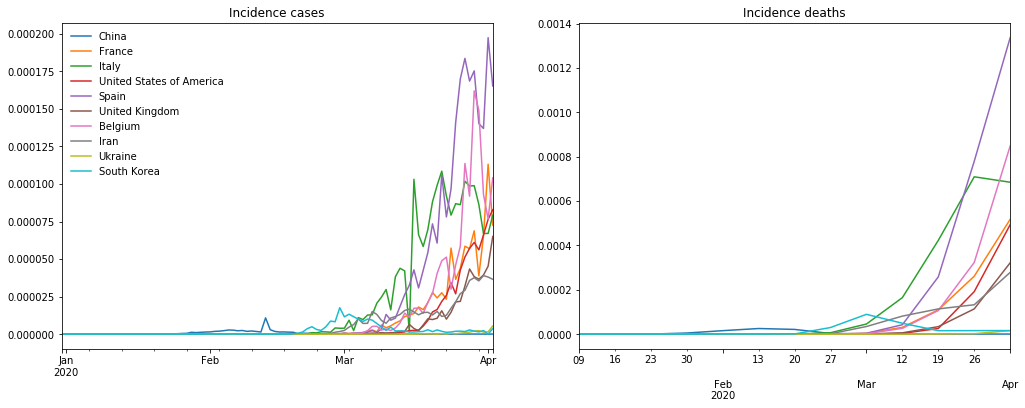

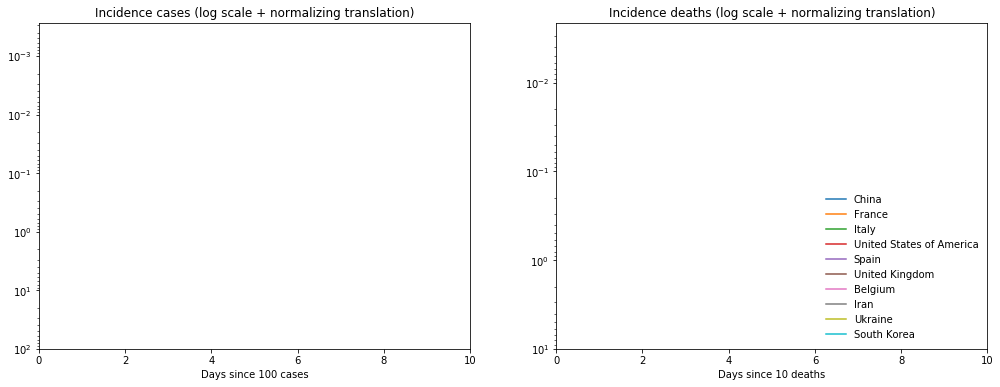

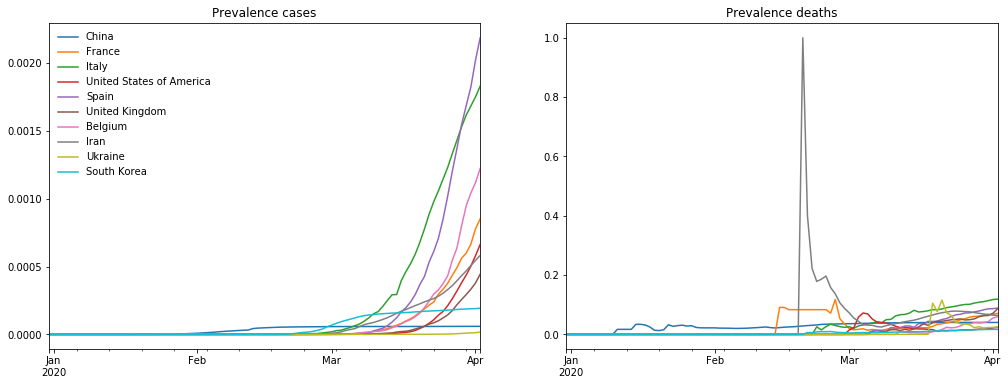

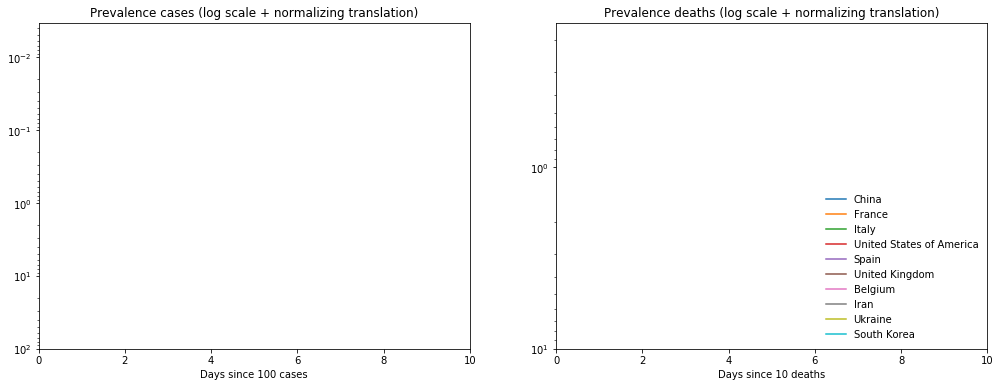

In [6]:
mt.plot_spread('incidence', countries_of_interest)
mt.plot_spread('incidence', countries_of_interest, 'log')
mt.plot_spread('prevalence', countries_of_interest)
mt.plot_spread('prevalence', countries_of_interest, 'log')